In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('normalized_text_without_outliers.csv')
category_labels = df["category"]


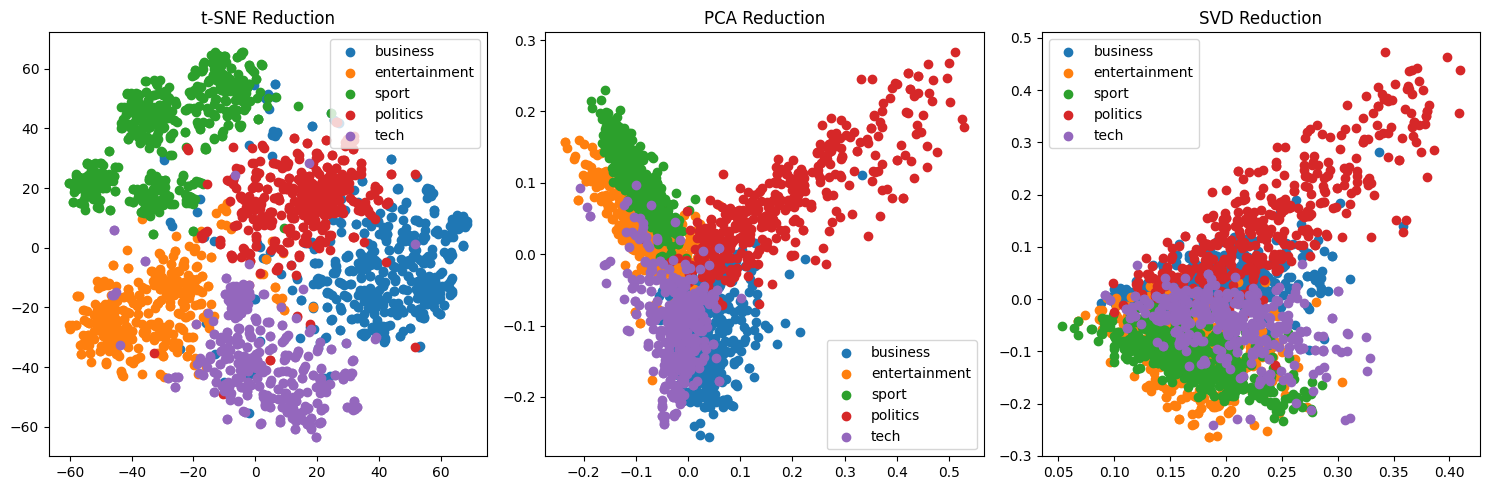

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

corpus = df['text'].values
vectorizer = TfidfVectorizer(max_df=0.9)
X = vectorizer.fit_transform(corpus)

tsne = TSNE(n_components=2, random_state=42)
pca = PCA(n_components=2)
svd = TruncatedSVD(n_components=2)


reductions = [('t-SNE', tsne), ('PCA', pca), ('SVD', svd)]

num_reductions = len(reductions)
rows = (num_reductions + 2) // 3
cols = min(num_reductions, 3)

plt.figure(figsize=(15, 5 * rows))

for i, (reduction_name, reduction_model) in enumerate(reductions):
    X_reduced = reduction_model.fit_transform(X.toarray())
    
    plt.subplot(rows, cols, i + 1)
    for category in set(category_labels):
        plt.scatter(X_reduced[category_labels == category, 0], 
                    X_reduced[category_labels == category, 1], label=category)
    
    plt.title(f"{reduction_name} Reduction")
    plt.legend()

plt.tight_layout()
plt.show()


Experiment with different t-SNE parameters

In [3]:
perplexities = [20, 100, 300]
learning_rates = [50, 500, 2000]

plt.figure(figsize=(15, 12))

for i, perplexity in enumerate(perplexities):
    for j, learning_rate in enumerate(learning_rates):
        tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, random_state=42)
        X_tsne = tsne.fit_transform(X.toarray())
        
        plt.subplot(len(perplexities), len(learning_rates), i * len(learning_rates) + j + 1)
        for label in set(category_labels):
            plt.scatter(X_tsne[category_labels == label, 0], 
                        X_tsne[category_labels == label, 1], label=f'Category {label}')
        plt.title(f"Perplexity: {perplexity}, Learning Rate: {learning_rate}")
        plt.legend()

plt.tight_layout()
plt.show()
